# Module 2: Supervised Learning

Welcome to the second module of this series! In this module you will first get a deeper look at what Supervised Learning is and where it can be used. Then you will explore the main use cases of supervised learning, namely regression and classification. 

**Module Overview:**

1. [Introduction to Supervised Learning](#intro)
2. [Training of Supervised Learning Models](#training)<br>
    2.1 [Parameters vs Hyperparameters](#params)<br>
    2.2 [Cost Function](#cost)<br>
3. [Evaluation of Supervised Learning Models](#evaluation)<br>
    3.1 [Evaluation Metrics for Regression](#reg_metrics)<br>
    3.2 [Evaluation Metrics for Classification](#clf_metrics)<br>
    3.3 [Overfitting and Underfitting](#over_under)
4. [Regression Models](#regression-main)<br>
    4.1 [Linear Regression](#lr_reg)<br>
    4.2 [Decision Trees](#dt_reg)<br>
    4.3 [Random Forest](#rf_reg)<br>
5. [Classification Models](#classification-main)<br>
    5.1 [Logistic Regression](#lr-clf)<br>
    5.2 [Decision Trees](#dt-clf)<br>
    5.3 [Random Forest](#rf-clf)<br>
6. [Conclusion](#conclusion)<br>

**Datasets:**

In this module we will work with the already preprocessed Swiss Food Composition dataset from **Module 1** for classification and the Chocolate Bar Ratings dataset[1] for regression. You can find the preprocessed datasets in the following directory `data/*_proc.csv`. While for detailed pre-processing steps you can see the `scripts/clean_chocolate_dataset.py` and `scripts/clean_swiss_food_dataset.py`.

As a quick recap, we will work with the resulting Swiss Food Composition dataset after having:
- removed the samples and features with more than 20% of missing values,
- split the dataset in train and test sets,
- imputed missing values using mean strategy,
- standardized the remaining data.

While the preprocessing steps performed on the Chocolate Bar Ratings dataset include:
- splitting the dataset into train and test, 
- impute missing values using mean strategy,
- standardize numerical features, 
- transform and one-hot encode `year_reviewed` and `bean_origin`.

<div class="note">
    <b>One-hot encoding:</b>
    <p>Categorical data as a sequence of characters are of no use to the mathematical models behind machine learning algorithms, so an efficient and effective way of representing them is needed. One-hot encoding is a way of representing categorical data in a numeric form. In case you would like to learn more about it, <a href="https://towardsdatascience.com/one-hot-encoding-scikit-vs-pandas-2133775567b8">see here</a>.</p>
</div>

<style>
    /* Styling for the note admonition */
    .note {
        padding: 10px;
        border-left: 4px solid #007BFF; /* Replace this with your desired border color */
        background-color: #f0f0f0; /* Replace this with your desired background color */
        margin: 10px 0;
    }
</style>

<a id="intro"></a>
## 1. Introduction to Supervised Learning

**Supervised learning** involves machine learning algorithms that aim to build models that learn from data and are able to predict future values. It is the same as building a mathematical equation or formula with many feature variables in order to derive the desired target variable. 
**The data points that the model uses to learn already contain the corresponding targets.** This is how the model learns to derive a connection between features and targets. 

There are two types of problems in the supervised setting: **regression** and **classification**. In **regression**, the output that the model learns and then tries to predict is a continuous value (e.g. learning age, height of people). In **classification**, the output that the model learns and then tries to predict is a categorical value (a class from a finite number of classes like a tumour being benign or malignant). 

[Figure 1](#sup_lear_reg_clf) illustrates the machine learning pipeline for supervised learning. From the figure, we can see that there are three main parts in the pipeline: (1) **Pre-processing of Data**, (2) **Training of the model** and (3) **Evaluation of the model**. During pre-processing, the raw data undergoes transformations such that it is ready to be used for training. We have already described these steps in Module 1. The pre-processed data is split into train and test sets. During training, the model will use the train set to learn. After the model has been trained on the test set, we use the test set to evaluate the model's performance on an unseen dataset. This is a way of quantifying how well the model has learned the data. When the model is ready to be used, it is given new, unseen samples and predicts either a continuous value or a label, depending on whether the task is regression or classification.

<center>
    <a id="sup_learn"></a>
    <img src="images/part2_supervised/supervised_learning_pipeline.jpg" alt="ML Supervised Learning" width="90%">
    <center><figcaption><em>Figure 1: Supervised Learning</em></figcaption></center>
</center>


###  1.1 Regression

In the case of regression, the model learns from the data, with the aim of outputting a continuous value similar to what it saw during the training phase. 
<center>
    <a id="regression"></a>
    <img src="images/part2_supervised/regression_illustration.jpg" alt="Regression" width="90%">
    <center><figcaption><em>Figure 2: Regression</em></figcaption></center>
</center>


[Figure 2](#regression) gives an illustration of regression in a 2D dataset. In this case, we have samples that have two coordinates: x and y. y depends on x, so y = f(x). The aim of regression is to find a function f(x) that *best* approximates the corresponding values of y. *Best* is quantified through the loss metrics that we are going to see in the next section. In our example, the learned function would be <span style="color:blue">a line of the form $$y=ax+b$$</span> indicated in <span style="color:blue">blue</span>. 
After the function (the model) is learned from the data, we can use it to predict the value of an unseen data sample (x',y') indicated in <span style="color:green">green</span>. 

Note that in real life, datasets have more than 2 dimensions. In this case, a line is not sufficient. This is why a plane (3 coordinates) or a hyperplane (>3 coordinates) are then used as the regression model to predict values. This is called **multiple linear regression**, in contrast to the example shown in Figure 2, which is **simple linear regression**.

Besides linear regression, which assumes linear relationship between the variables, there are other types of regression like Decision Tree regression and Random Forest regression, which we will cover further below.

### 1.2 Classification

In classification, the target variable that the model tries to learn from the data and later predict is a class or a category. 

<center>
    <a id="classification"></a>
    <img src="images/part2_supervised/classification_illustration.jpg" alt="Classification" width="90%">
    <center><figcaption><em>Figure 3: Classification</em></figcaption></center>
</center>

[Figure 3](#classification) shows an example of samples in a 2D coordinate system. As you can see, the samples belong to two classes: <span style="color:red">red</span> or <span style="color:green">green</span>. As we can see, the samples of the two classes are linearly separable. So, the model can learn a line that can perfectly separate the two classes. <span style="color:blue">This line is indicated in blue</span> in our example. A new, unseen sample will be classified based on which side of the boundary it will fall. In our case, the circled sample is below the boundary line, so the model will classify it as <span style="color:red">red</span>.

Note that in real life scenarios, datasets have many more dimensions and classes. Also, classes may not be linearly separable. In this cases, the models will be hyperplanes or other structures that will be able to capture non-linear dependencies. In this tutorial, we will see in action Logistic Regression, Decision Tree classifiers and Random Forest classifiers.

💡 **CHECKPOINT:**
- In the following scenarios, would you use regression or classification algorithms:
    1. We have a dataset that contains student characteristics and their scores in the past 5 exams. We would like to predict their *score* in the next exam.
    2. We have a dataset that contains the ingredient composition of some food samples. we would like to predict what *category* the food belongs to.
    3. We have a dataset that contains different images of animals. We would like to be able to predict the *type* of animal.
    4. We have a dataset of stock prices of a company for the past 10 years. We would like to predict the *stock price* for the upcoming year.

<a id="training"></a>
## 2. Training of Supervised Learning Models

<a  id="params"></a>
### 2.1 Parameters vs Hyperparameters


In machine learning, parameters and hyperparameters play different roles. The **parameters** are values that **the machine learning model learns from the data**. At the end of the learning process, the data will be described by a mathematical equation. The main goal of the learning process is to find the parameters of this mathematical equation that would best describe the data. For example, suppose that you have some points scattered in a 2D coordinate system, just like in [Figure 2](#regression). Your aim is to find the line with an equation of the form: $$y = ax + b$$. 

In this case, `a` and `b` are the parameters that the model can learn from the points so that the learned line represents the data in the best possible way.

On the other hand, **hyperparameters control the learning process itself and how the parameters will be computed**. Hyperparameters are set by the data scientists/analysts and they are not learned by the model. You can think of them as **settings or configurations to tune the learning process**. Usually people use intuition, trial-and-error, and other, more sophisticated techniques like cross-validation to pick the right hyperparameters that would make the learning process faster and produce more accurate results (for more on cross-validation see [here](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85)). Coming back to the line example, the hyperparameters will determine **how complex** the equation of the line describing the points will be.

All in all, **parameters determine the model output, while hyperparameters determine the way how the parameters are learned**. You can read more about the distinction between parameters and hyperparameters [in this blog post](https://towardsdatascience.com/parameters-and-hyperparameters-aa609601a9ac).

💡 **CHECKPOINT:**
- How do parameters differ from hyperparameters? What role does each of them play in the learning process?
- What is tuned by the data analyst and what is learned by the model?

<a id="cost"></a>
### 2.2 Cost function

The **cost function**, an essential part of all machine learning algorithms, quantifies how well the model can approximate the data. It is otherwise known as loss metric, loss function or objective function. It measures, how different the predictions of the model are from the true values. 

The cost function is a function of the parameters of the model. For example, in regression tasks, a common cost function used is the **mean squared error** (MSE): $$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2$$, where $y_i$ is the actual value and $\hat{y_i}$ is the predicted value for sample $i$. Referring to [Figure 2](#regression), $\hat{y_i}=ax_i + b $ and the cost function can be written as:$$\text{MSE}=L(a,b)=\frac{1}{n} \sum_{i=1}^{n} (y_i - (ax_i + b))^2$$. We need to find the values of $a$ and $b$, for which minimum $MSE$ is attained. This can be solved analytically by finding the derivative of $L$ with respect to $a$ and $b$, then equalizing them to 0 and solving them for $a$ and $b$. However, an analytic solution is not always possible. That is why, to find the optimal parameters, algorithms like Gradient Descent are used. Gradient Descent is able to find the optimal solutions by computing the predictions and loss function in multiple iterations. [Figure 4](#gradient-descent) illustrates the process. You can learn more about Gradient Descent [here](https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21). 

Note that MSE is not the only cost function used in regression tasks. Other cost functions include: mean error, mean absolute error, etc.

<center>
    <a id="gradient-descent"></a>
    <img src="images/part2_supervised/lin_reg.gif" alt="Gradient Descent" width="90%">
    <center><figcaption><em>Figure 4: Cost function in Linear Regression</em></figcaption></center>
</center>


The concept of cost function in classification is the same, however, different cost functions are applied in classification tasks. Two commonly used cost functions are: **binary cross-entropy** and **categorical cross-entropy**. **Binary cross-entropy** is used in binary class classification problems, while the **categorical cross-entropy** is used in multi-class classification problems. Again, during training, the parameters of the model are adjusted to minimize the value of the cost function, iteratively, using algorithms like Gradient Descent. You can learn more about binary and categorical cross-entropy [here](https://gombru.github.io/2018/05/23/cross_entropy_loss/).

Cost functions are not only used during training but also during model evaluation, as we will see in the next section.

<a id="evaluation"></a>
## 3. Evaluation of Supervised Learning Models

Evaluation metrics help us in assessing how suitable a machine learning model is for a specific task. They are important for quantifying how well the models have learned from the data on which they were trained, and how well a machine learning model is suited to a particular task.

There are many evaluation metrics available depending on the task (classification or regression) and the characteristics of the dataset (e.g imbalanced classes). Below we will explore some of the evaluation metrics that are commonly used for classification and regression.

<a id="reg_metrics"></a>
### 3.1 Evaluation metrics for regression

**Mean Squared Error (MSE)** and **R-squared (R2)** are two of the most frequently used evaluation metrics in regression tasks. The formula for calculating MSE is: $$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2$$,
the same as in the previous section, since MSE can be used both for evaluation of the model and as a cost function.

The formula for R2 is:$$R^2 = 1 - \frac{RSS}{TSS}$$, where:
-  $RSS$ is **the sum of squared residuals** calculated as: $RSS = (y_i - \hat{y_i})^2$, where $y_i$ is the target value for sample $i$ and the $\hat{y_i}$ is the predicted value for sample $i$.
- $TSS$ is **the total sum of squares**  calculated as: $TSS = (y_i - \bar{y})^2$, where $y_i$ is the target value for sample $i$ and $\bar{y}$ is the mean of the target values. 

R2 measures the proportion of variance in the target variable  that is explained by the model. It varies between 0 and 1. An R2 of 0 indicates that the models does not capture any variance in the target variable at all, while an R2=1 indicates that the model captures all the variance in the target variable.

[Figure 5](#squared-errors) gives an illustration of the squared errors for different regression lines. The error ($y_i-\hat{y_i}$) is considered to be the vertical distance between the y coordinate of the point and the regression line, shown in blue. The squares in the figure represent the squared errors (($y_i-\hat{y_i})^2$). 

<center>
    <a id="squared-errors"></a>
    <img src="images/part2_supervised/linear_regression.gif" alt="Linear Regression errors" width="50%" height="50%">
    <center><figcaption><em>Figure 5: Linear Regression Squared Errors</em></figcaption></center>
</center>


<a id="clf_metrics"></a>
### 3.2 Evaluation metrics for classification

Some of the most frequently used evaluation metrics in classification problems are: **accuracy**, **F1-score**, **receiver operating characteristic (ROC) curve** and **precision recall (PRC) curve**. The last two metrics are graphs and we are more interested in the area under this graph. Before analyzing the metrics, it is important to know and understand these terms:
 - **True Positive Samples (TP)**: these are samples that are classified as positive by the model and at the same time they belong to the positive class.
 - **True Negative Samples (TN)**: these are samples that are classified as negative by the model and at the same time they belong to the negative class.
 - **False Positive Samples (FP)**: these are samples that are classified as positive by the model but they belong to the negative class.
 - **False Negative Samples (FN)**: these are samples that are classified as negative by the model but they belong to the positive class.


[Figure 5](#confusion-matrix) gives an illustration of these values. All the valuation metrics we will explore are based on these four values.
<center>
    <a id="confusion-matrix"></a>
    <img src="images/part2_supervised/confusion_matrix.jpg" alt="Confusion Matrix" width="40%" height="40%">
    <center><figcaption><em>Figure 5: Confusion Matrix</em></figcaption></center>
</center>
 

1. **Accuracy** - is the proportion of correctly classified samples by the model out of all samples: $Accuracy = \frac{TP+TN}{N}$, where $N$ is the total number of samples tested.
2. **F1-score** - is the harmonic mean of precision and recall, where:
    - $Precision = \frac{TP}{TP+FP}$, is the ratio between the true positive samples and the total samples classified as positive by the model and,
    - $Recall = \frac{TP}{TP + FN}$, is the ratio of the true positive samples and the total real positive samples. 
F1 score balances these metrics and it is helpful especially in dealing with imbalanced classes. F1 score ranges from 0 to 1, with values near 1 indicating a good model.
3. **ROC curve** - is a graph that plots the true positive rate (precision) against the false positive rate ($FPR = \frac{FP}{FP + TN}$) at different classification thresholds (e.g at different threshold probabilities to classify a sample as positive). When using this metric, we are more interested in the area under the ROC curve (**ROC AUC**), the higher the area under the ROC curve, the better the model. The maximum value achievable is 1. For more information on the ROC curve, you can read [this article](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc).
4. **PRC curve** - plots the precision vs the recall across different classification thresholds, just like the ROC curve. Again the higher the value of the area under the curve (**AUC PRC**), the better the performance of the model. The maximum value achievable is 1. 



<div class="note">
    <b>Classification Threshold:</b>
    <p>The classification threshold determines the minimum required score (probability) for a sample to be classified as positive. For example, if we set the classification threshold in a classification model to 80%, this means that the model will only classify as positive those samples that are predicted to be positive with a probability of 80% or greater. All other samples will be classified as negative. On the other hand, if we set the threshold to 50%, all samples that are predicted to be positive with a probability of 50% or greater will be classified as positive.</p>
</div>

<style>
    /* Styling for the note admonition */
    .note {
        padding: 10px;
        border-left: 4px solid #007BFF; /* Replace this with your desired border color */
        background-color: #f0f0f0; /* Replace this with your desired background color */
        margin: 10px 0;
    }
</style>


💡**CHECKPOINT:**
- What do you think will happen with the number of predicted positive and negative samples if we increase the classification threshold from 50% to 80%?

<a id="over_under"></a>
### 3.3 Overfitting and Underfitting

Sometimes, in order to better assess the performance of the model, it is necessary to check the performance on both the train and the test sets and compare the metrics. We want a model that has optimal performance and is neither underfitting nor overfitting.

**Overfitting** - happens when the performance of the model on the train set is a lot higher than on the test set. In this case, the model has learned the train set *by heart*, but cannot generalize well on new, unseen samples. In other words, the model overfits the train set. Some of the methods to deal with overfitting include: using a less complex model and regularization. 

**Underfitting** - happens when the model cannot learn the underlying relationships of the data because it might be too simple. The performance metrics on both the training and test sets are low. One way to deal with underfitting is to choose a more complex model.

[Figure 6](#over-under-fitting) illustrates overfitting and underfitting.
<center>
    <a id="over-under-fitting"></a>
    <img src="images/part2_supervised/overfitting_underfitting.jpg" alt="Overfitting Underfitting" width="80%" height="60%">
    <center><figcaption><em>Figure 6: Overfitting and Underfitting Illustration</em></figcaption></center>
</center>


<div class="note">
    <b>Regularization:</b>
    <p>It is a way to penalize complex models and thus reduce overfitting during training. Since machine learning models are trained on the train set, they try to learn the train set in the best possible way. 
    This increases the risk that the model will not generalise well to new, unseen data. Regularisation therefore helps to make the model more robust and avoid overfitting. To learn more about regularization, <a href="https://developers.google.com/machine-learning/crash-course/regularization-for-simplicity/video-lecture">see here</a>.</p>
</div>

<style>
    /* Styling for the note admonition */
    .note {
        padding: 10px;
        border-left: 4px solid #007BFF; /* Replace this with your desired border color */
        background-color: #f0f0f0; /* Replace this with your desired background color */
        margin: 10px 0;
    }
</style>


💡 **CHECKPOINT:**
- How does a model perform on the train or test set when it overfits? What about when it underfits?
- *We have a dataset that contains 1000 points, each of them having a single feature. The function that will approximate these points will have the form $y=ax^2+bx+c$. We do not want the model to overfit the data, so we set a regularization parameter λ=0.1, to be used during the training process. Since we do not want to wait long, we also determine the number of steps that the loss function will be computed and the weights updated, n=100.* Given this scenario, determine whether a, b, c, λ and n are parameters or hyperparameters.

<a id="regression-main"></a>
## 4. Regression Models

In this section we are going to cover three different regression models: Linear Regression, Decision Trees and Random Forest. After training these models we will evaluate their performance on the Chocolate Bar Ratings dataset. Note that this dataset is already pre-processed. All pre-processing steps can be found in the `'scripts/clean_chocolate_dataset.py'` file. 

First, we will start by importing the necessary libraries, reading the dataset and defining some helper functions that we will need.

In [1]:
import os
import pandas as  pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, f1_score
import ipywidgets as widgets
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
from sklearn.linear_model import LogisticRegression

In [2]:
filepath = os.path.join( "data", "chocolate_bars_proc.csv")
chocolate_dataset = pd.read_csv(filepath, index_col='id')
chocolate_dataset.head()

,cocoa_percent,num_ingredients,rating,split,year_binary,country_peru,country_venezuela
id,,,,,,,
1,0.771568,-0.04148,3.25,train,1,0,0
2,0.771568,-0.04148,3.50,test,1,0,0
3,0.771568,-0.04148,3.75,train,1,0,0
4,-0.682486,-0.04148,3.00,train,1,0,0
5,0.044541,-0.04148,3.00,train,1,0,1


In the below code cell, we will select only the features that we will need for the regression task. Our target feature (the value the model will learn to predict) will be the `rating`. Thus, if we give as input to the model the bean origin, the year of the review, the cocoa percentage and the number of ingredients, it will be able to predict the rating of the chocolate bar:

In [3]:
chocolate_dataset = chocolate_dataset[['cocoa_percent','num_ingredients', 'year_binary',\
                                           'country_venezuela', 'country_peru', \
                                                'split', 'rating']]
chocolate_dataset.head()

,cocoa_percent,num_ingredients,year_binary,country_venezuela,country_peru,split,rating
id,,,,,,,
1,0.771568,-0.04148,1,0,0,train,3.25
2,0.771568,-0.04148,1,0,0,test,3.50
3,0.771568,-0.04148,1,0,0,train,3.75
4,-0.682486,-0.04148,1,0,0,train,3.00
5,0.044541,-0.04148,1,1,0,train,3.00


In [4]:
def get_train_test_sets(dataset:pd.DataFrame, feature_cols:list, target_col:str) -> (pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame):
    '''
    Function used to split the dataset intro train and test sets and return the train
    and test features and target variables. The split is based on the pre-processing steps 
    included in the clean_chocolate_dataset.py script.

    Args:
     - dataset: the dataset that will be split
     - feature_cols: a list with the names of the feature columns
     - target_col: a string with the name of the target column

    Returns:
     - four pandas dataframes containing the train features, train targets,
     test features and test targets.
    '''

    train_data = dataset[dataset['split'] == 'train']
    test_data = dataset[dataset['split'] == 'test']
    
    return train_data[feature_cols], train_data[target_col], \
        test_data[feature_cols], test_data[target_col]

In [5]:
def run_regressor(regressor, title:str, dataset:pd.DataFrame) -> None:
    '''
    This function will take a regressor object as well as the title
    of the plot that will be visualized, as input. It will train the
    regressor on the train set and get regressor's predictions on the
    train and test sets. In the end it will call the visualize_results
    function to visualize the results that the trained model can achieve.

    Args:
     - regressor: is the regression object
     - title: the title of the plot that will be displayed
     - dataset: the dataset that will be learned

    Returns: nothing
    '''
    feature_cols = dataset.columns.difference(['split', 'rating'])
    target_col = 'rating'

    train_set_features, train_set_ratings, \
        test_set_features, test_set_ratings = get_train_test_sets(chocolate_dataset, 
                                                                  feature_cols, 
                                                                  target_col)
    
    regressor.fit(train_set_features, train_set_ratings)
    
    y_train_pred = regressor.predict(train_set_features)
    y_test_pred = regressor.predict(test_set_features)

    visualize_results(train_set_ratings, y_train_pred, 
                      test_set_ratings, y_test_pred,
                      title)

def visualize_results(y_train_true:np.array, y_train_pred:np.array, 
                      y_test_true:np.array, y_test_pred:np.array, title:str) -> None:
    '''
    This function is used to visualize the results achieved by a regressor.

    Args:
     - y_train_true: the true targets of the train set
     - y_train_pred: the predicted targets of the train set from the regressor
     - y_test_true: the true targets of the test set
     - y_test_pred: the predicted targets of the test set from the regressor
     - title: the title of the plot that will be displayed

    Returns: nothing
    '''

    mse_train = f"MSE (Train) = {mean_squared_error(y_train_true, y_train_pred):.3f}"
    mse_test = f"MSE (Test) = {mean_squared_error(y_test_true, y_test_pred):.3f}"
    r2_train = f"R2 (Train) = {r2_score(y_train_true, y_train_pred):.3f}"
    r2_test = f"R2 (Test) = {r2_score(y_test_true, y_test_pred):.3f}"

    _, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

    axes[0].scatter(x=y_train_true, y=y_train_pred, s=4)
    axes[0].plot(y_train_true, y_train_true, color='red', label='Perfect Model')
    axes[0].set_xlabel("True Rating")
    axes[0].set_ylabel("Predicted Rating")
    axes[0].set_title("Predicted vs Actual - Train Set");
    axes[0].text(3.5, 1.25, mse_train, fontsize=10, color='black', ha='center', va='center')
    axes[0].text(3.5, 1.0, r2_train, fontsize=10, color='black', ha='center', va='center')
    axes[0].legend()

    axes[1].scatter(x=y_test_true, y=y_test_pred, s=4)
    axes[1].plot(y_test_true, y_test_true, color='red', label='Perfect Model')
    axes[1].set_xlabel("True Rating")
    axes[1].set_ylabel("Predicted Rating")
    axes[1].set_title("Predicted vs Actual - Test Set");
    axes[1].text(3.65, 1.75, mse_test, fontsize=10, color='black', ha='center', va='center')
    axes[1].text(3.65, 1.5, r2_test, fontsize=10, color='black', ha='center', va='center')
    axes[1].legend()
    
    plt.suptitle(title)

The functions above will help us later when we create, initialize and run the models. The first function `get_train_test_sets()` will take the original dataset as an argument and will return 4 datasets corresponding to the train features, test features, train targets and test targets. The second function, `run_regressor()` will take  a regressor object, the title that will be displayed in the plot and original dataset. It will train the regressor model on the train features and target variables and then will call the `visualize_results()` function. As its name indicates, it will calculate the MSE and R2 in both the train and test sets and will plot the `actual vs predicted ratings` for the target variable of the dataset. 

Now we are ready to initialize our models and see their performance on our regression task.

<a id="lr_reg"></a>
### 4.1 Linear Regression

Linear Regression is one of the simplest regression models. Given the data it will try to find a linear equation that best fits it. Our model will be of the form:
$$rating  = w_1\times cocoa\_percent + w_2\times num\_ingredients + w_3\times year\_binary + w_4\times country\_venezuela + w_5\times country\_peru$$

During training it will learn the weights: $w_1, w_2, w_3, w_4, w_5$. After training, using the above equation it will be able to predict a rating for a given set of features. We will use the `initialize_linear_regressor` function to initialize the `LinearRegression()` object from the `sklearn` library. We determine the `title` of the plot when the results will be visualized and then, we call the `run_regressor()` function which will train the model and then call the visualization function. You can run the two below code cells to see the results: 

In [6]:
def initialize_linear_regressor(chocolate_dataset:pd.DataFrame):
    regressor = LinearRegression()
    title = f"Linear Regression"
    run_regressor(regressor, title, chocolate_dataset)

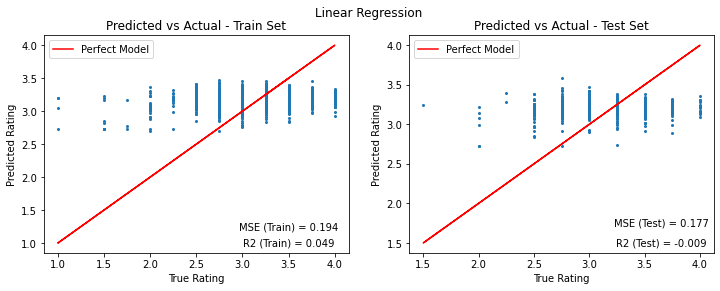

In [7]:
initialize_linear_regressor(chocolate_dataset)

The plots show the performance of the model both on the train and test sets. The red line indicates a perfect match between the actual and predicted ratings, while the blue dots plot the actual and predicted values.

<a id="dt_reg"></a>
### 4.2 Decision Trees

In contrast to linear regression, a decision tree will predict a rating by *asking a series of questions about the data*. [Figure 7](#decision-trees) gives a high level view of the process. By following the arrows from the root of the tree, down to the leaves. Depending on the values the features of the sample have, the tree is able to make a prediction about the rating of a sample. The thresholds for making a split as well as the nodes themselves are learned during the training process.
<center>
    <a id="decision_tree"></a>
    <img src="images/part2_supervised/decision_tree.jpg" alt="Decision Tree" width="60%" height="60%">
    <center><figcaption><em>Figure 7: Decision tree model Illustration</em></figcaption></center>
</center>



Just like in linear regression, we use the `initialize_decision_tree_regressor()` to initialize the decision tree model and pass `max_depth` hyperparameter as a parameter to the function. One of the most important hyperparameters that we can finetune is the `max_depth`. Through it we can control how deep the tree will be. The deeper the tree the more likely that the model will learn the dataset by heart and overfit. By keeping the trees shallow, we reduce overfitting. It is important though to find a balance in order to prevent underfitting as well. When initializing the `DecisionTreeRegressor` we pass the `random_state=0` hyperparameter to make the results reproducible. The rest of the procedure is the same as in Linear Regression. This function gets the dataset as a parameter as well.

In [8]:
def initialize_decision_tree_regressor(max_depth:int, chocolate_dataset:pd.DataFrame):
    regressor = DecisionTreeRegressor(max_depth=max_depth, random_state=0)
    title = f"Decision Tree Regression - max_depth={max_depth}"
    run_regressor(regressor, title, chocolate_dataset)

You can interact with the slider below and try different values for the `max_depth` hyperparameter.

In [9]:
max_depth_slider_1 = widgets.IntSlider(value=10, min=1, max=20, step=1, description='max_depth:')
widgets.interact_manual(initialize_decision_tree_regressor,
                        max_depth=max_depth_slider_1,
                        chocolate_dataset = widgets.fixed(chocolate_dataset));

interactive(children=(IntSlider(value=10, description='max_depth:', max=20, min=1), Button(description='Run In…

💡 **CHECKPOINT:**
- In the above code snippet, try different values for `max_depth`. How does increasing the value of this hyperparameter affect model performance in train and test sets? What does that mean? Which value of `max_depth` would you choose?

<a id="rf_reg"></a>
### 4.3 Random Forest

The Random Forest models are part of the ensemble models. Ensemble learning models combine different machine learning models with the aim of increasing the performance. In these models, a prediction is reached by aggregating the predictions of each of the models that make the ensemble. [Figure 8](#random-forest) gives an illustration of a random forest model. The random forest model is made of many decision trees. The number of decision trees is determined by the `n_estimators` hyperparameter. Meanwhile, the depth of each decision tree is determined by the `max_depth` hyperparameter. In the below code cells, you can use the sliders to experiment with different values of these hyperparameters and see how they affect the MSE and R2 evaluation metrics.
<center>
    <a id="random_forest"></a>
    <img src="images/part2_supervised/random_forest.jpg" alt="Random Forest" width="80%" height="60%">
    <center><figcaption><em>Figure 8: Random Forest Model Illustration</em></figcaption></center>
</center>

In [10]:
def initialize_random_forest_regressor(n_estimators:int, max_depth:int, chocolate_dataset:pd.DataFrame):
    regressor = RandomForestRegressor(n_estimators=n_estimators, 
                                      max_depth=max_depth, random_state=0)
    title = f"Random Forest Regression - n_estimators={n_estimators} and max_depth={max_depth}"
    run_regressor(regressor, title, chocolate_dataset)

In [11]:
n_estimators_slider = widgets.IntSlider(value=30, min=10, max=1000, step=5, description='n_estimators:')
max_depth_slider_2 = widgets.IntSlider(value=10, min=1, max=20, step=1, description='max_depth:')
widgets.interact_manual(initialize_random_forest_regressor,
                        n_estimators=n_estimators_slider,
                        max_depth=max_depth_slider_2,
                        chocolate_dataset = widgets.fixed(chocolate_dataset));

interactive(children=(IntSlider(value=30, description='n_estimators:', max=1000, min=10, step=5), IntSlider(va…

💡 **CHECKPOINT:**
- In the above code snippet, try different values for `n_estimators` and `max_depth`. How does increasing the values of these hyperparameters affect model performance in train and test sets? What does that mean?

<a id="classification-main"></a>
## 5. Classification Models

In this section we are going to cover three different classification models: Logistic Regression, Decision Trees and Random Forest. After training we will evaluate their performance on the Swiss Food Composition dataset. Note that this dataset is already pre-processed. All pre-processing steps can be found in the `'scripts/clean_swiss_food_dataset.py'` file. The classification task will consist of predicting the category of the food sample which will be **binary**. This transformation of the category column happens in the `prepare_dataset()` helper function.

First, we will start by importing the necessary libraries, reading the dataset and defining some helper functions that we will need.

In [12]:
filepath = os.path.join("data", "swiss_food_composition_proc.csv")
dataset = pd.read_csv(filepath, index_col=0)
dataset.head()

,name,category,energy_kcal,fat_g,fatty_acids_sat_g,fatty_acids_monounsat_g,fatty_acids_polyunsat_g,cholesterol_mg,carbohydrates_g,sugars_g,...,potassium_mg,sodium_mg,chloride_mg,calcium_mg,magnesium_mg,phosphorus_mg,iron_mg,iodide_µg,zinc_mg,split
ID,,,,,,,,,,,,,,,,,,,,,
2,Almond,fruits,2.383884,2.367211,0.007568,3.747869,1.491113,-0.536758,-0.392082,0.004006,...,1.588591,-0.159777,-0.148160,1.295299,4.040213,2.312243,0.749351,-0.106408,1.315695,train
3,"Almond, dry roasted, salted",nuts,2.458504,2.390231,0.007568,3.980279,1.745907,-0.536758,-0.285661,-0.117252,...,1.488645,-0.083438,0.108003,1.295299,4.816868,2.059374,0.906205,-0.088162,1.315695,train
4,"Almond, roasted, salted",nuts,2.527384,2.545613,0.020843,4.212688,1.825530,-0.536758,-0.419844,-0.138650,...,1.355384,-0.050088,0.108003,1.098111,4.622704,2.059374,0.749351,-0.088162,1.185016,test
5,"Amaranth, seed, cooked (without addition of fa...",cereals,-0.514820,-0.510234,-0.483593,-0.476516,-0.196900,-0.536758,0.084497,-0.431096,...,-0.377014,-0.159511,-0.149051,-0.098161,1.011260,0.226077,0.631711,-0.101432,-0.056440,test
6,"Amaranth, seed, raw",cereals,0.960362,-0.228244,-0.337572,-0.312462,0.121593,-0.536758,1.875138,-0.345502,...,0.722392,-0.158810,-0.132568,0.572278,4.234377,2.628328,2.984515,-0.087333,1.577054,train


In [13]:
def encode_label_category(label:str, label_column:pd.Series) -> pd.Series:
    '''
    This function converts the label_column to a column containing binary values
    of 0 or 1. The rows whose value will be equal to `label` will contain a 1. All
    the other rows will contain a 0.

    Args:
        - label: the category that will be encoded with 1
        - label_column: the column that will be transformed

    Return:
    The transformed column.
    '''
    return label_column.apply(lambda x: 1 if x == label else 0)

def prepare_dataset(label:str, original_dataset:pd.DataFrame) -> (pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame):
    
    ''' 
    This function is used to prepare the original dataset for the next steps in 
    supervised learning. It extracts the labels, does the manual encoding of the 
    category specified in the label parameter and splits the dataset into train and 
    test based on the split from Module 1. Also, here the features and labels are
    splitted in different dataframes.

    Args: 
        - label: the category that will be classified
        - original_datatset: the dataset
    
    Returns:
        - train_features, test_features, train_labels, test_labels
    '''
    
    labels_col = original_dataset['category']
    
    one_hot_labels = encode_label_category(label=label, label_column=labels_col)
    
    original_dataset['category_binary'] = one_hot_labels
    
    not_needed_cols = ['name', 'category', 'split', 'category_binary']
    feature_cols = original_dataset.columns.difference(not_needed_cols)
    target_col = 'category_binary'

    return get_train_test_sets(original_dataset, feature_cols=feature_cols, target_col=target_col)

In [14]:
cereals_train_set_features, \
    cereals_train_set_labels, \
    cereals_test_set_features, \
        cereals_test_set_labels = prepare_dataset("cereals", dataset)

Below we can have a look, what the train and test sets contain:

In [15]:
cereals_train_set_features.head()

,alcohol_g,beta_carotene_activity_µg,beta_carotene_µg,calcium_mg,carbohydrates_g,chloride_mg,cholesterol_mg,energy_kcal,fat_g,fatty_acids_monounsat_g,...,vit_A_activity_re_µg,vit_B12_µg,vit_B1_mg,vit_B2_mg,vit_B6_mg,vit_c_mg,vit_d_µg,vit_e_activity_mg,water_g,zinc_mg
ID,,,,,,,,,,,,,,,,,,,,,
2,-0.122655,-0.164054,-0.160407,1.295299,-0.392082,-0.148160,-0.536758,2.383884,2.367211,3.747869,...,-0.182957,-0.219544,0.010923,2.814479,-0.167012,-0.399327,-0.346081,4.417923,-1.954732,1.315695
3,-0.122655,-0.163317,-0.159667,1.295299,-0.285661,0.108003,-0.536758,2.458504,2.390231,3.980279,...,-0.182957,-0.219544,-0.146968,3.746767,-0.125736,-0.426040,-0.346081,3.862716,-1.986216,1.315695
6,-0.122655,-0.164054,-0.160407,0.572278,1.875138,-0.132568,-0.536758,0.960362,-0.228244,-0.312462,...,-0.182957,-0.219544,-0.146968,0.125184,1.484020,-0.201648,-0.346081,-0.077520,-1.681869,1.577054
7,-0.122655,-0.164054,-0.160407,-0.025858,2.795907,-0.146601,-0.536758,1.465483,0.117049,0.521478,...,-0.182957,-0.201410,-0.237192,0.555472,-0.538494,-0.420698,-0.346081,0.885417,-2.070174,-0.317799
8,-0.122655,-0.154476,-0.150793,0.966653,-0.743732,1.179435,0.285864,0.363401,0.594705,1.341747,...,-0.164188,3.842408,-0.259748,0.125184,0.452125,-0.404670,0.642980,0.672010,-0.016704,0.008900


In [16]:
cereals_train_set_labels.head()

ID
2    0
3    0
6    1
7    0
8    0
Name: category_binary, dtype: int64

In [17]:
def get_plot_titles(category:str, max_depth:int, n_estimators:int, clf_type:str) -> str:
    '''
    This function creates the title of the plot that will be displayed.
    The title is created based on the category that will be learned,
    the hyperparameters of the classifier and the classifier type.

    Parameters:
     - category: is the category that is learned.
     - max_depth: determines the maximum depths of the
     decision tree or random forest. Needed only if clf_type 
     is `dt` or `rf`.
     - n_estimators: is the number of trees in the random forest
     classifier. Needed only if clf_type is `rf`.
     - clf_type: the type of classifier: logistic regression (lr),
     decision tree (dt) and random forest (rf).

     Returns:
     The plot title.
    '''

    if clf_type=="lr":
        return f'Logistic Regression: category={category}'
    elif clf_type=="dt":
        return f'Decision Tree: category={category}: max_depth={max_depth}'
    elif clf_type=="rf":
        return f'Random Forest: category={category}: max_depth={max_depth} and n_estimators={n_estimators}'
    return ''

def run_auc_roc_prc(clf, X_train:pd.DataFrame, X_test:pd.DataFrame, y_train:pd.DataFrame, y_test:pd.DataFrame, sup_title:str):

    '''
    This function is used to visualize the ROC and PRC curves, we well as to
    calculate and display the accuracy and F1 scores. 

    Args:
     - clf: the classifier
     - X_train: is the features of the train set
     - X_test: is the features of the test set
     - y_train: the labels of the train set
     - y_test: the labels of the test set
     - sup_title: the title of the plot

    Returns: nothing
    '''

    roc_title = f'ROC - curve'
    prc_title = f'PRC - curve'
      
    print(f"Accuracy (Test): {accuracy_score(y_true=y_test, y_pred=clf.predict(X_test)):.2f}")
    print(f"F1-score (Test): {f1_score(y_true=y_test, y_pred=clf.predict(X_test)):.2f}")
    print(f"Accuracy (Train): {accuracy_score(y_true=y_train, y_pred=clf.predict(X_train)):.2f}")
    print(f"F1-score (Train): {f1_score(y_true=y_train, y_pred=clf.predict(X_train)):.2f}")
    

    _, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    axes[0].set_title(roc_title)
    axes[1].set_title(prc_title) 
    RocCurveDisplay.from_estimator(clf, X_test, y_test, \
        name="Test set", ax=axes[0], alpha=0.8, plot_chance_level=True)
    RocCurveDisplay.from_estimator(clf, X_train, y_train, \
        name="Train set", ax=axes[0], alpha=0.8)
    PrecisionRecallDisplay.from_estimator(clf, X_test, y_test,\
         name="Test set", ax=axes[1], alpha=0.8, plot_chance_level=True)
    PrecisionRecallDisplay.from_estimator(clf, X_train, y_train,\
         name="Train set", ax=axes[1], alpha=0.8)

    plt.suptitle(sup_title)
    plt.show()

<a id="lr-clf"></a>
### 5.1 Logistic Regression

Despite of its name, logistic regression is a classification model. It is the equivalent of Linear Regression in classification tasks. It tries to find a linear equation that receives the features of a sample as input and outputs the predicted class. The model's equation will be similar to that of Linear Regression:
$$category \;probability  = \frac{1}{1+e^{-(w_1\times f_1 + w_2\times f_2 + {w_3}\times f_3 + ... + w_n\times f_n)}}$$
During training, the model will learn the weights $w_1, w_2, ..., w_n$. After training, when it will receive a new sample, it will compute the above function to find the category probability and based on a classification threshold determined by the data scientist, it will predict the category.

Below, the `run_logistic_regression_classifier()` function will initialize the Logistic Regression object by giving the `random_state=0` as argument to make the results reproducible. Then we call the `run_auc_roc_prc()` function to visualize the results obtained by the model.

In [18]:
def run_logistic_regression_classifier(dataset:pd.DataFrame):
    '''
    This function splits the dataset into the train and test sets. Then it 
    creates the plot title. Afterwards, it initializes the model and trains it.
    Then the results are visualized by calling the run_auc_roc_prc() helper
    function.
    
    Args:
     - dataset: a pandas dataframe containing the dataset
    
    Returns: nothing
    '''
    # split the dataset into train and test set
    train_data_features, train_data_labels,\
          test_data_features, test_data_labels \
            = prepare_dataset(label="cereals", original_dataset=dataset)
    
    # create the title of the plot
    sup_title = get_plot_titles('Cereals', max_depth=None, \
                                n_estimators=None, clf_type="lr")

    # initialize the model
    lr_classifier = LogisticRegression(random_state=0)
    # train the model
    lr_classifier.fit(train_data_features, train_data_labels.values.ravel())
    # visualize results
    run_auc_roc_prc(lr_classifier, X_train=train_data_features, 
                                   y_train=train_data_labels, X_test=test_data_features,
                                   y_test=test_data_labels, sup_title=sup_title)

Accuracy (Test): 0.95
F1-score (Test): 0.81
Accuracy (Train): 0.96
F1-score (Train): 0.83


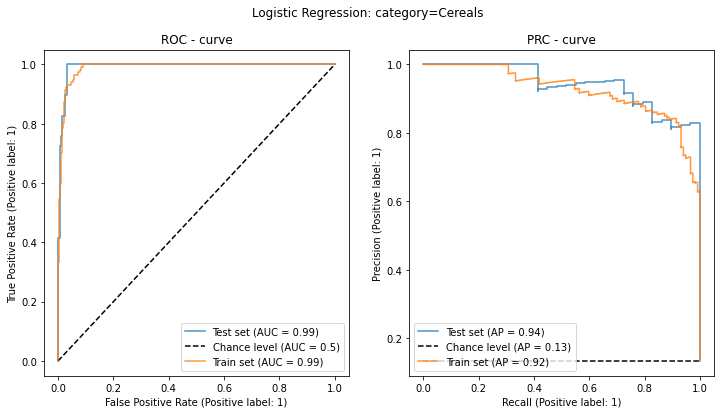

In [19]:
run_logistic_regression_classifier(dataset=dataset)

<a id="dt-clf"></a>
### 5.2 Decision Trees

Decision Trees, can be used for classification tasks, in the same way as they are used for regression tasks. The only difference is that instead of predicting continuous values they will predict categories. [Figure 9](#decision_tree_clf) illustrates the process. Again the split thresholds are learned during training. Just like in regression, we determine the depth of the tree using the `max_depth` hyperparameter, that has the same function as in the regression example above.
<center>
    <a id="decision_tree_clf"></a>
    <img src="images/part2_supervised/decision_tree_clf.jpg" alt="Decision Trees" width="60%" height="60%">
    <center><figcaption><em>Figure 9: Decision Tree for Classification</em></figcaption></center>
</center>

In [20]:
def run_decision_tree_classifier(max_depth:int, dataset:pd.DataFrame):
    '''
    This function splits the dataset into the train and test sets. Then it 
    creates the plot title. Afterwards, it initializes the decision tree classifier model 
    and trains it. Then the results are visualized by calling the run_auc_roc_prc() helper
    function.

    Args:
     - max_depth: the depth of the decision tree
     - dataset: a pandas dataframe containing the dataset
    
    Returns: nothing
    '''
    # split the dataset into train and test set
    train_data_features, train_data_labels,\
        test_data_features, test_data_labels \
            = prepare_dataset(label="cereals", original_dataset=dataset)
    # create the title of the plot
    sup_title = get_plot_titles('Cereals', max_depth=max_depth, \
                                n_estimators=None, clf_type="dt")
    # initialize the model
    dt_classifier = DecisionTreeClassifier(max_depth=max_depth,
                                           random_state=0)
    # train the model
    dt_classifier.fit(train_data_features, train_data_labels.values.ravel())
    # visualize the results 
    run_auc_roc_prc(dt_classifier, X_train=train_data_features, 
                                   y_train=train_data_labels, X_test=test_data_features,
                                   y_test=test_data_labels, sup_title=sup_title)

You can use the slider to determine the `max_depth` of the decision tree, and see how this will affect model performance.

In [21]:
max_depth_slider_3 = widgets.IntSlider(value=10, min=1, max=20,\
                                        step=1, description='max_depth:')
widgets.interact_manual(run_decision_tree_classifier,
                        max_depth=max_depth_slider_3,
                        dataset=widgets.fixed(dataset)
                        );

interactive(children=(IntSlider(value=10, description='max_depth:', max=20, min=1), Button(description='Run In…

<a id="rf-clf"></a>
### 5.3 Random Forest

The Random Forest model for classification is the same as for regression. There will be two hyperparameters to experiment with again: `max_depth` and `n_estimators`. The number of decision trees is determined by the `n_estimators` hyperparameter. Meanwhile, the depth of each decision tree is determined by the `max_depth` hyperparameter. In the below code cells, you can use the sliders to experiment with different values of these hyperparameters and see how they affect the accuracy, F1 score and ROC and PRC areas..
<center>
    <a id="random_forest_clf"></a>
    <img src="images/part2_supervised/random_forest_clf.jpg" alt="Random Forest" width="80%" height="60%">
    <center><figcaption><em>Figure 10: Random Forest Model Illustration</em></figcaption></center>
</center>

In [22]:
def run_random_forest_classifier(n_estimators:int, max_depth:int, dataset:pd.DataFrame):
    '''
    This function splits the dataset into the train and test sets. Then it 
    creates the plot title. Afterwards, it initializes the random forest classifier model 
    and trains it. Then the results are visualized by calling the run_auc_roc_prc() helper
    function.

    Args:
     - max_depth: the depth of the trees of the random forest
     - n_estimators: the number of trees of the random forest
     - dataset: a pandas dataframe containing the dataset
    
    Returns: nothing
    '''
    # split the dataset into train and test set
    train_data_features, train_data_labels,\
        test_data_features, test_data_labels \
            = prepare_dataset(label="cereals", original_dataset=dataset)
    # create the title of the plot
    sup_title = get_plot_titles('Cereals', n_estimators=n_estimators, \
                                max_depth=max_depth, clf_type="rf")
    # initialize the model
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, 
                                           max_depth=max_depth,
                                           random_state=0)
    # train the model
    rf_classifier.fit(train_data_features, train_data_labels.values.ravel())
    # visualize the results
    run_auc_roc_prc(rf_classifier, X_train=train_data_features, 
                                   y_train=train_data_labels, X_test=test_data_features,
                                   y_test=test_data_labels, sup_title=sup_title)

In [23]:
n_estimators_slider = widgets.IntSlider(value=30, min=10, max=1000,\
                                         step=5, description='n_estimators:')
max_depth_slider_4 = widgets.IntSlider(value=10, min=1, max=20,\
                                        step=1, description='max_depth:')

In [24]:
widgets.interact_manual(run_random_forest_classifier, 
                        n_estimators=n_estimators_slider,
                        max_depth=max_depth_slider_4,
                        dataset=widgets.fixed(dataset)
                        );

interactive(children=(IntSlider(value=30, description='n_estimators:', max=1000, min=10, step=5), IntSlider(va…

💡 **CHECKPOINT:**
- Compare and contrast the performance of the three types of classifiers. Set `max_depth=4` for both the Decision Tree classifier and the Random Forest classifier. Also, for the random Forest classifier set the `n_estimators=30`. With these hyperparameter settings, compare the performance of the three models. Which performs the best? Where can you see indications of overfitting/underfitting? What are some measures to prevent overfitting/underfitting in our specific case?

<a id="conclusion"></a>
## 6. Conclusion

In this module we dived into supervised learning. First, we defined what supervised learning is and its main use cases: classification and regression. Secondly, we explored the training process, the difference between parameters and hyperparameters, and the notion of cost function. Then we moved on to the evaluation part, where we saw different evaluation metrics used in regression and classification. In the last two sections, we experienced different regression and classification models in action.

In the next module, we will explore unsupervised learning.

**References:**

[1] https://www.kaggle.com/datasets/evangower/chocolate-bar-ratings